In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
database = pd.read_csv('database.csv')
database.head()

,samples,type,NM_004900,AA085955,NM_014616,AK092846,NM_001539,THC2450799,NM_006709,NM_000978,...,AF117899,A_24_P287526,THC2349421,THC2272949,NM_138411,THC2350949,CR600872,NM_016058,AF520801,NM_203414
0,GSM831223_ATL-_1,ATL,7.759333,5.526977,9.279413,4.730458,11.097001,5.409710,6.194557,14.282856,...,5.856063,6.534970,6.035496,7.476790,4.866324,4.612706,6.109501,9.462370,4.612706,8.484984
1,GSM831224_ATL-_2,ATL,6.080513,5.503887,9.128079,4.903375,10.930584,4.631126,6.381124,14.280562,...,5.826412,6.413272,5.948900,5.948900,5.269268,4.698254,5.718088,9.490950,4.663896,7.095295
2,GSM831225_ATL-_3,ATL,9.594372,6.582465,9.838391,5.881773,11.568524,5.305547,6.743412,14.235741,...,5.548070,5.928725,6.013459,8.529502,5.471272,4.700643,5.834031,9.543813,4.882895,8.562290
3,GSM831226_ATL-_4,ATL,5.668196,5.513552,8.622807,4.830928,11.720891,4.651672,6.116554,14.611248,...,5.770464,6.347991,6.844252,8.372397,5.240151,5.073481,5.073481,10.083024,4.782399,6.541959
4,GSM831227_ATL-_5,ATL,7.979572,5.193283,8.893503,5.030561,11.073585,5.347932,6.014682,14.596186,...,5.383804,5.878142,5.353299,7.449356,5.224082,5.038731,5.279458,9.853553,4.671153,7.844617


In [3]:
database.shape

(71, 33581)

In [4]:
# split the data into train and test
database = database.drop('samples', axis=1)
X = database.drop('type', axis=1)
y = database['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# KNN - k-nearest neighbors

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
knn_classifier = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [7]:
predictions = knn_classifier.predict(X_test)
predictions

array(['ATL', 'normal', 'ATL', 'ATL', 'ATL', 'ATL', 'ATL', 'ATL', 'ATL',
       'normal', 'ATL', 'ATL', 'normal', 'ATL', 'normal', 'ATL', 'ATL',
       'ATL', 'ATL', 'ATL', 'normal', 'normal'], dtype=object)

In [8]:
y_test

39       ATL
51    normal
11       ATL
18       ATL
30       ATL
38       ATL
26       ATL
23       ATL
40       ATL
50    normal
20       ATL
45       ATL
70    normal
41       ATL
66    normal
5        ATL
28       ATL
0        ATL
12       ATL
6        ATL
54    normal
60    normal
Name: type, dtype: object

In [9]:
from sklearn.metrics import accuracy_score, classification_report

In [10]:
accuracy_score(y_test, predictions)

1.0

/home/jonathan/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1.0

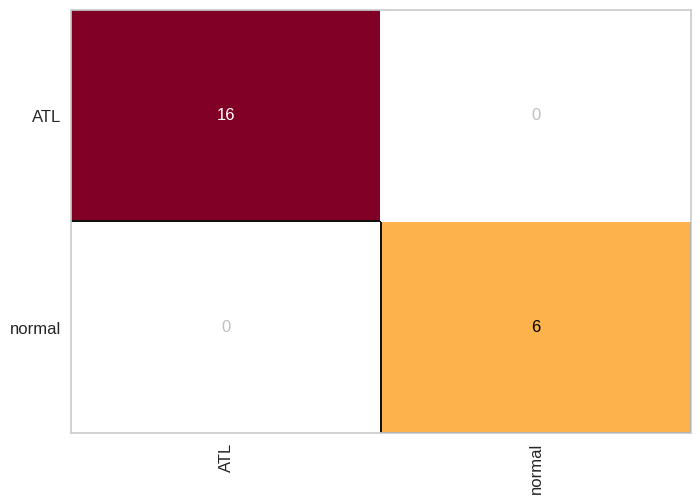

In [11]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_classifier)
cm.fit(X_train, y_train) 
cm.score(X_test, y_test)

In [12]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ATL       1.00      1.00      1.00        16
      normal       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

